___
# Exercício: Titanic - Tomando decisão com Teorema de Bayes
___

## Aula 06

<div id="indice"></div>

## Índice

- [Titanic](#titanic)
- [Objetivo](#obj)
- [Classificador sem considerar qualquer característica do passageiro](#apriori)
- [Classificador Naive-Bayes com a variável `Sex`](#naivebayes)
- [Classificando os passageiros](#class)
- [Análise de sentimento](#sentimento)
- [Para casa: Estudo Complementar](#casa)
- [Classificador Naive-Bayes com a variável `Pclass`](#classPclass)
- [Separando conjunto de dados em Treinamento (train)  e Teste (test)](#testtrain)
___

<div id="titanic"></div>

## Titanic

Entre as muitas competições disponíveis na plataforma Kaggle, encontra-se a de *Machine Learning* do Titanic conforme apresentado neste [link](https://www.kaggle.com/c/titanic/data).

A base de dados apresentada no arquivo `titanic.xlsx` contém informação de 891 passageiros para os quais foram mensurados as seguintes informações (as categorias serão mantidas em inglês assim como os nomes das variáveis):
 
 * `Survived`: indica se passageiro sobreviveu ou não.
    - 0 = No,
    - 1 = Yes.
 * `Pclass`: indica a classe da passagem (*ticket*).
    - 1 = 1st, 
    - 2 = 2nd, 
    - 3 = 3rd.
 * `Sex`: sexo do passageiro. 
    - female,
    - male.
 * `Age`: idade em anos.
 * `Sibsp`: número de irmãos e/ou cônjuges a bordo do Titanic.
 * `Parch`: número de pais e/ou filhos a bordo do Titanic.
 * `Ticket`: número do *ticket*.
 * `Fare`: tarifa do passageiro.
 * `Cabin`: número da cabine.
 * `Embarked`: portão de embarque.
    - C = Cherbourg, 
    - Q = Queenstown, 
    - S = Southampton.


**Notas:**
A variável `Pclass` pode ser considerada uma *proxy* da situação socioeconômico do passageiro, ou seja, 
1st = Upper, 2nd = Middle,  3rd = Lower.


___

<div id="obj"></div>

## Objetivo

Imagine que você com as suas características estivesse no Titanic no dia no naufrágio. Será que você teria sido um sobrevivente ou não??

Assim, o objetivo dessa atividade é classificar um "novo" passageiro do Titanic como Sobrevivente ou não Sobrevivente levando em considerando (ou seja, aprendendo) o perfil dos sobreviventes e não sobreviventes que de fato estavam no Titanic.

___
Carregando algumas bibliotecas:

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\quezi\OneDrive\Área de Trabalho\CD21-2\aula06


Carregando os dados do arquivo `titanic.xlsx`:

In [3]:
dados = pd.read_excel('titanic.xlsx')

#### Para saber quantas linhas (passageiros) e colunas (variáveis) há no *DataFrame* nomeado `dados`:

In [4]:
dados.shape # (Linha, coluna) - (Passageiros, variáveis)

(891, 12)

___
**Definindo as variáveis qualitativas como categóricas:**

O pandas não tem como saber quais variáveis são qualitativas ao carregar os dados.
#### Então precisamos modificar as colunas explicitamente.

Já deixamos isso pronto para você nesta avaliação:

In [5]:
dados['Survived'] = dados['Survived'].astype('category')
dados['Pclass'] = dados['Pclass'].astype('category')
dados['Sex'] = dados['Sex'].astype('category')
dados['Cabin'] = dados['Cabin'].astype('category')
dados['Embarked'] = dados['Embarked'].astype('category')

Agora vamos renomear os rótulos das variáveis qualitativas `Survived` e `Pclass` com comando `.cat.categories`:

In [6]:
dados.Sex.cat.categories = ['female','male']
dados.Pclass.cat.categories = ['1st','2nd','3rd']
dados.Survived.cat.categories = ['No', 'Yes']

In [7]:
dados.Sex = pd.Categorical(dados.Sex, categories=['female','male'], ordered = False)
dados.Pclass = pd.Categorical(dados.Pclass, categories=['1st','2nd','3rd'], ordered = True)
dados.Survived = pd.Categorical(dados.Survived, categories=['No', 'Yes'], ordered = False)

___
***DataFrame* `dados` que deve considerar nos passos a seguir:**

In [8]:
dados.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,No,3rd,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,Yes,1st,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,Yes,3rd,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


<div id="apriori"></div>

___
## Classificador sem considerar qualquer característica do passageiro

Como você poderia dar um "chute" inicial para avaliar se um novo passageiro seria ou não sobrevivente no Titanic?

Podemos usar uma probabilidade conhecida como **a priori** que não leva em consideração qualquer característica do passageiro. Essa probabilidade é dada por:

$$\qquad P(sobrevivente)\qquad \mbox{e} \qquad P(não\hspace{1mm}sobrevivente).$$

Assuma $S$ como evento ser sobrevivente e $S^c$ como evento não ser sobrevivente.

Agora, calcule essas probabilidades a partir da base de dados. Lembra que você aqui pode usar o comando `value_counts()`.

In [9]:
# Tabela de frequências relativas => Probabilidades marginais
dados.Survived.value_counts(
    

# value_counts - Faz a contagem de cada rotúlo
    
True, sort = False).round(4)

# round(4) -> 4 casas decimais

No     0.6162
Yes    0.3838
Name: Survived, dtype: float64

E aí? Se chegasse alguém agora para ser um passageiro do Titanic, esse seria classificado como sobrevivente ou não sobrevivente?

E se chegassem 1.000 passageiros?

In [10]:
# Coloque sua resposta aqui

<div id="naivebayes"></div>

___
## Classificador Naive-Bayes

Um Classificador Naive-Bayes permite que seja feito uma classificação, aqui, como sobrevivente ou não sobrevivente, porém levando em considerando **alguma(s) característica(s)** do passageiro. 

Vale ressaltar a importância de utilizar características (variáveis ou *features*) do passageiro que sejam associadas (dependentes) da variável *target* `Survived` que fornece a classificação.

Vamos entender o **Teorema de Bayes** utilizando a característica do passageiro descrita na variável `Sex`. Ainda, vamos utilizar os eventos $S$ para sobrevivente, $F$ para feminino e $M$ para masculino.

A probabilidade de **ser sobrevivente** dado cada categoria da variável `Sex` pode ser escrita como:

$$P(S|F)=\frac{P(S \cap F)}{P(F)}=\frac{P(F|S)P(S)}{P(F)}\hspace{3cm}\mbox{(I)}$$

e

$$P(S|M)=\frac{P(S \cap M)}{P(M)}=\frac{P(M|S)P(S)}{P(M)}\hspace{2.5cm}\mbox{(II)}$$


Por consequência, a probabilidade de **não ser sobrevivente** dado cada categoria da variável `Sex` pode ser escrita como:

$$P(S^c|F)=1-P(S|F)$$

e

$$P(S^c|M)=1-P(S|M)$$


Agora, vamos obter todas as probabilidade envolvidas do lado direito das equações $\mbox{(I)}$ e $\mbox{(II)}$ acima descritas utilizando os resultados amostrais.

### Probabilidades que devemos calcular a partir da base de dados:

Para facilitar, vamos obter tais probabilidades nos seguintes passos:

 1. Calcular as probabilides $P(S)$, $P(S^c)$, $P(F)$ e $P(M)$. Lembra que aqui você pode usar o comando `value_counts()`.
 1. Construir um conjunto de dados apenas com os sobreviventes e um outro apenas com os não sobreviventes.
 1. Em cada conjunto de dados, calcular a probabilidade de ser cada categoria da variável `Sex`, ou seja, 
     * Entre os sobreviventes: calcular $𝑃(F|S)$ e $𝑃(M|S)$ a partir da base de dados. Aqui pode usar o comando `value_counts()`.
     * Entre os não sobreviventes: calcular $𝑃(F|S^c)$ e $𝑃(M|S^c)$ a partir da base de dados. Aqui pode usar o comando `value_counts()`.
          
 1. Com todas essas probabilidades, calcular $P(S|F)$, $P(S^c|F)$, $P(S|M)$ e $P(S^c|M)$.

Vamos lá! **Passo-a-passo**:

 1. Calcule as probabilidades $P(S)$, $P(S^c)$, $P(F)$ e $P(M)$. Lembra que aqui você pode usar o comando `value_counts()`.

 OBS.: Guarde essas probabilidades nas respectivas variáveis do python `P_S`, `P_Sc`, `P_F` e `P_M`.

In [11]:
# Item resolvido a seguir. Use como referência para demais itens!

In [12]:
prob_surv = dados.Survived.value_counts(True, sort = False)
# prob_surv = dados.Survived.value_counts(Normalize = True, sort = False)
# Nomalize = True - Frequências relativas
prob_surv

No     0.616162
Yes    0.383838
Name: Survived, dtype: float64

In [13]:
prob_surv = dados.Survived.value_counts(True, sort = True)
# prob_surv = dados.Survived.value_counts(Normalize = True, sort = False)
# Nomalize = True - Frequências relativas
prob_surv

No     0.616162
Yes    0.383838
Name: Survived, dtype: float64

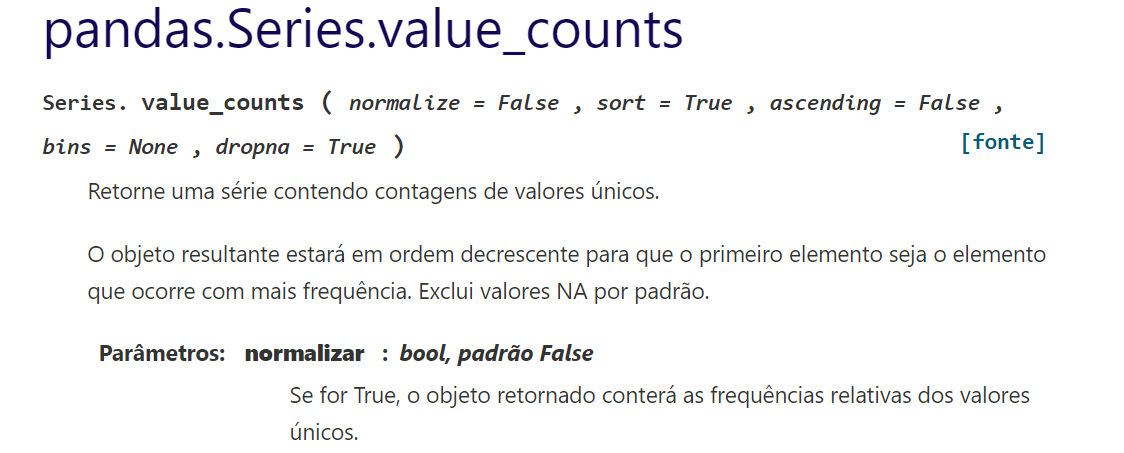

In [14]:
prob_surv = dados.Survived.value_counts(True, sort = False)
prob_surv
P_Sc = prob_surv[0]
P_S = prob_surv[1]

print(f'Probabilidade a priori de não sobreviver: {P_Sc:0.5g}')
print(f'Probabilidade a priori de sobreviver: {P_S:0.5g}')

Probabilidade a priori de não sobreviver: 0.61616
Probabilidade a priori de sobreviver: 0.38384


In [15]:
prob_sex = dados.Sex.value_counts(True, sort=False)
prob_sex

female    0.352413
male      0.647587
Name: Sex, dtype: float64

### Para que serve sort = False??

In [16]:
prob_sex = dados.Sex.value_counts(True, sort=False)


P_F = prob_sex[0]
P_M = prob_sex[1]

print(f'Probabilidade de ser do sexo feminino: {P_F:0.5g}')
print(f'Probabilidade de ser do sexo masculino: {P_M:0.5g}')

Probabilidade de ser do sexo feminino: 0.35241
Probabilidade de ser do sexo masculino: 0.64759


 2. Construa um conjunto de dados apenas com os sobreviventes e um outro apenas com os não sobreviventes.
 
 OBS.: Guarde esses conjuntos de dados nas respectivas variáveis do python `dados_S` e `dados_Sc`.

In [17]:
# Coloque seu código aqui
dados_Sobrevivencia = dados['Survived'].to_frame()
dados_Sobrevivencia

,Survived
0,No
1,Yes
2,Yes
3,Yes
4,No
...,...
886,No
887,Yes
888,No
889,Yes


In [34]:
dados_S = dados.loc[dados['Survived'] == 'Yes']
dados_S.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,Yes,1st,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,Yes,3rd,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,Yes,1st,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,Yes,3rd,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,Yes,2nd,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [36]:
dados_Sc = dados.loc[dados['Survived'] == 'No']
dados_Sc.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,No,3rd,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,No,3rd,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,No,3rd,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,No,1st,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,No,3rd,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


 3. Entre os sobreviventes: calcule $𝑃(F|S)$ e $𝑃(M|S)$ a partir da base de dado `dados_S`. Aqui pode usar o comando `value_counts()`.
  
 OBS.: Guarde essas probabilidades nas respectivas variáveis do python `P_F_dado_S` e `P_M_dados_S`.
 
 <br> 
 
*Respostas esperadas:*
 
*Probabilidade de ser do sexo feminino entre os sobreviventes: 0.68129*
 
*Probabilidade de ser do sexo masculino entre os sobreviventes: 0.31871*

In [22]:
# Coloque seu código aqui.

In [79]:
pd.crosstab(dados['Sex'],dados['Survived'], margins = True).round(8) 

Survived,No,Yes,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


### Como se calcula usando o value_counts()?

In [86]:
Prob_F_dado_S = 233/342
Prob_F_dado_S

print(f'Probabilidade de mulheres sobreviverem dentre os sobreviventes é: {Prob_F_dado_S:0.5}')

Probabilidade de mulheres sobreviverem dentre os sobreviventes é: 0.68129


In [87]:
Prob_M_dado_S = 109/342
Prob_M_dado_S
print(f'Probabilidade de mulheres sobreviverem dentre os sobreviventes é: {Prob_M_dado_S:0.5}')

Probabilidade de mulheres sobreviverem dentre os sobreviventes é: 0.31871


 3. Entre os não sobreviventes: calcule $𝑃(F|S^c)$ e $𝑃(M|S^c)$ a partir da base de dados `dados_Sc`. Aqui pode usar o comando `value_counts()`.
          
  OBS.: Guarde essas probabilidades nas respectivas variáveis do python `P_F_dado_Sc` e `P_M_dados_Sc`.
  
<br> 
 
*Respostas esperadas:*
 
*Probabilidade de ser do sexo feminino entre os não sobreviventes: 0.14754*

*Probabilidade de ser do sexo masculino entre os não sobreviventes: 0.85246*

In [89]:
Prob_F_dado_Sc = 81/549
Prob_F_dado_Sc

0.14754098360655737

In [90]:
Prob_M_dado_Sc = 468/549
Prob_M_dado_Sc

0.8524590163934426

 4. Com todas essas probabilidades, calcule $P(S|F)$, $P(S^c|F)$, $P(S|M)$ e $P(S^c|M)$ seguindo as equações (I) e (II).
 
 OBS.: Guarde essas probabilidades nas respectivas variáveis do python `P_S_dado_F`, `P_Sc_dado_F`, `P_S_dado_F` e `P_Sc_dado_M`.
 
<br> 
 
*Respostas esperadas:*
 
*Probabilidade de ser sobreviventdo se feminino: 0.74204*

*Probabilidade de ser não sobrevivente se feminino: 0.25796*

*Probabilidade de ser sobreviventdo se masculino: 0.18891*

*Probabilidade de ser não sobrevivente se masculino: 0.81109*

In [24]:
# Coloque seu código aqui.

<div id="class"></div>

___
## Classificando os passageiros 

Considerando seu **Classificador Naive-Bayes**, classifique cada passageiro do *DataFrame* `dados`como `No` ou `Yes` considerando apenas a variável `Sex`.

Conforme apresentado na Seção Classification descrita neste [link](https://sebastianraschka.com/Articles/2014_naive_bayes_1.html), a classificação considerando a variável `Sex` dará da seguinte forma:

$$\begin{array}{lll} 
    \mbox{Se } P(S|F)>P(S^c|F) & \mbox{então } & \mbox{Classificar como Sobrevivente} \\
                                               & \mbox{caso contrário } & \mbox{Classificar como Não Sobrevivente} 
   \end{array}$$

No dataframe `dados`, guarde essas classificações em uma nova variável chamada `ClassBySex`. 

In [25]:
# Classificando as mulheres
if (P_S_dado_F > P_Sc_dado_F):
    dados.loc[(dados.Sex=='female'),'ClassBySex'] = 'Yes'
else:
    dados.loc[(dados.Sex=='female'),'ClassBySex'] = 'No'
    

NameError: name 'P_S_dado_F' is not defined

In [ ]:
# Classificando os homens
if (P_S_dado_M > P_Sc_dado_M):
    dados.loc[(dados.Sex=='male'),'ClassBySex'] = 'Yes'
else:
    dados.loc[(dados.Sex=='male'),'ClassBySex'] = 'No'

In [ ]:
dados.head(3)

<div id="sentimento"></div>

___
## Análise de sentimento

Faça uma análise de sentimento cruzando a variável `ClassBySex` com a real classificação `Survived` utilizando a função `pd.crosstab`.

Analise os resultados.

*Resposta esperada:*

 
Survived        | ClassBySex=No  | ClassBySex=Yes
--------------- | -------------- | --------------------
Survived=No     |0.525253        | 0.090909
Survived=Yes    |0.122334        | 0.261504

In [ ]:
# Coloque seu código aqui

In [76]:
pd.crosstab(dados['Sex'],dados['Survived'], margins = True).round(8) 

Survived,No,Yes,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


In [ ]:
p = 233/